**This program is about detetcting and cropping faces from UTKFace dataset to form a dataset of faces with 100 x 100 spatial resolution using RetinaFace deep learning face detection approach. This program was run multiple times to process subsets of images part by part. The full details of the multiple runs are given the excel file named "Information about multiple runs to extract 100 x 100 input images".**

In [ ]:
!pip install retina-face

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from retinaface import RetinaFace
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/My Drive/UTKFace_extracted/"
os.listdir(folder_path)

['part2', 'part3', 'part1']

### Displaying example images from 3 parts in the dataset

In [ ]:
for folder in os.listdir(folder_path):
  for file in os.listdir(folder_path+folder):
    file_path = os.path.join(folder_path,folder,file)
    print(file_path)
    ## Read the images
    img = cv2.imread((file_path), cv2.IMREAD_COLOR)
    # Convert default BGR format to RGB to use in Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)
    print(img.shape)
    break


### Generating a text file with paths to every input face
Go to folder (click folder icon on left and save the file.)

In [ ]:
output_path = "/content/drive/My Drive/UTKFace_retina_cropped_100x100/"
out_noface_image_path = "/content/drive/My Drive/UTKFace_retina_cropped_noface_100x100/"

cnt = 0
sum = 0

with open('saving_input_image_paths.txt', 'a') as f:    # 'a' : append
  for folder in sorted(os.listdir(folder_path)):# Sort folder list
    number_files = len(os.listdir(os.path.join(folder_path,folder)))
    sum = sum + number_files
    #print(f"folder: {folder}, files: {number_files}")

    for file in sorted(os.listdir(folder_path+folder)):  # Sort file list
      file_path = os.path.join(folder_path,folder,file)
      out_image_path = output_path+file
      #detect_face(file_path, out_image_path)
      cnt = cnt + 1
      f.write(file_path)
      #if cnt == 10:
      #  break
    #break

print(f"Number of faces: {sum}")
#print(f"Total faces cropped: {cnt}")

Number of faces: 24109


### Reading an example image from the saved text file

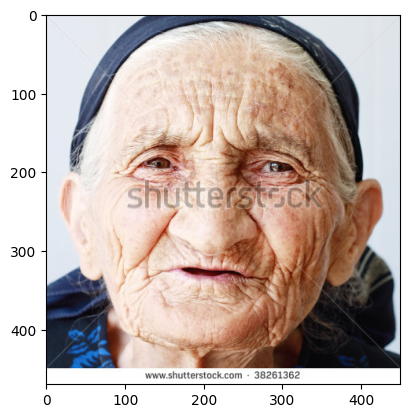

In [ ]:
file_path = "/content/drive/My Drive/saved_input_image_paths.txt"

# Initialize an empty list to store image paths
image_paths = []

# Open the .txt file and read each line
with open(file_path, 'r') as file:
    for line in file:
        # Strip any trailing newlines or spaces and append to the list
        image_paths.append(line.strip())

# List of image paths
#print(image_paths)

for path in image_paths:
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(img)
  break


### Cropping and Resizing function

In [ ]:
def detect_face(input_image_path, output_image_path, out_noface_image_path, margin=0.2):
    # Load image
    image = Image.open(input_image_path)

    # Convert the image to a NumPy array (RetinaFace works with NumPy arrays)
    image_array = np.array(image)

    # Detect faces
    faces = RetinaFace.detect_faces(image_array)

    if faces:
        for key in faces.keys():
            face = faces[key]
            facial_area = face["facial_area"]

            # Get the bounding box coordinates for the face
            x, y, x2, y2 = facial_area

            # Calculate the width and height of the bounding box
            width = x2 - x
            height = y2 - y

            # Add margin to each side
            x_new = max(0, x - int(width * margin))
            y_new = max(0, y - int(height * margin))
            x2_new = min(image.width, x2 + int(width * margin))
            y2_new = min(image.height, y2 + int(height * margin))

            # Crop the face region with added margins
            cropped_face = image.crop((x_new, y_new, x2_new, y2_new))

            # Resize to 100x100
            resized_face = cropped_face.resize((100, 100))

            # Save the cropped face with margin
            resized_face.save(output_image_path)

            break   # Only one face per image according to the UTKFace dataset.
    else:
        #print("No faces detected in the input image.")

        no_face = Image.open(input_image_path)

        # Resize the image to 100x100 pixels
        # resized_image = no_face.resize((100, 100))

        no_face_image_path = os.path.join(out_noface_image_path, input_image_path.split('/')[-1])

        # Save the resized image to a new file
        no_face.save(no_face_image_path)


### List of input image paths

In [ ]:
file_path = "/content/drive/My Drive/saved_input_image_paths.txt"

# Initialize an empty list to store image paths
image_paths = []

# Open the .txt file and read each line
with open(file_path, 'r') as file:
    for line in file:
        # Strip any trailing newlines or spaces and append to the list
        image_paths.append(line.strip())

# List of image paths, #print(image_paths)

In [ ]:
output_folder = "/content/drive/My Drive/UTKFace_retina_cropped_100x100/"
out_noface_image_path = "/content/drive/My Drive/UTKFace_retina_cropped_noface_100x100/"

# The following range was changed multiple times as shown in the excel file
# named "Information about multiple runs to extract 100 x 100 input images"

# Following shows the subset processed.
set1 = image_paths[24000:24109]    # image_paths: 24109

for ind, path in enumerate(set1):
  input_image_path = path
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  #print(input_image_path)                     # e.g. /content/drive/My Drive/UTKFace_extracted/part1/100_1_0_20170110183726390.jpg
  #print(input_image_path.split('/')[-1])      # e.g. 100_1_0_20170110183726390.jpg

  output_image_path = os.path.join(output_folder, input_image_path.split('/')[-1])
  #print(output_image_path)                     # e.g. /content/drive/My Drive/UTKFace_retina_cropped_100x100/100_1_0_20170110183726390.jpg

  print(ind)
  print(path)
  print(img.shape)

  detect_face(input_image_path, output_image_path, out_noface_image_path)

0
/content/drive/My Drive/UTKFace_extracted/part3/80_1_3_20170119212033985.jpg
(369, 494, 3)
1
/content/drive/My Drive/UTKFace_extracted/part3/81_0_0_20170117091321806.jpg
(226, 232, 3)
2
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120134927295.jpg
(337, 298, 3)
3
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120224920120.jpg
(679, 1018, 3)
4
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120224959056.jpg
(505, 332, 3)
5
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120225516057.jpg
(227, 342, 3)
6
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120225836610.jpg
(389, 520, 3)
7
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120230502538.jpg
(507, 378, 3)
8
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120230530059.jpg
(519, 390, 3)
9
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120230532540.jpg
(423, 478, 3)
10
/content/drive/My Drive/UTKFace_extracted/part3/81_1_0_20170120230

In [ ]:
number_cropped_faces = len(os.listdir(output_folder))
number_missed_faces = len(os.listdir(out_noface_image_path))

total = number_cropped_faces + number_missed_faces

print(f"Cropped faces: {number_cropped_faces}, Missed: {number_missed_faces}")
print(f"Cropped faces%: {number_cropped_faces/total*100}, Missed%: {number_missed_faces/total*100}")

Cropped faces: 23565, Missed: 521
Cropped faces%: 97.83691771153367, Missed%: 2.163082288466329
